## Assignment 2: Time Series Forecasting

### Dongju Ma A1942340

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
df = pd.read_csv('./data/energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### 2. Analyse and visualise the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [96]:
data = df[['date', 'Appliances']].copy()
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data

,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60
...,...
2016-05-27 17:20:00,100
2016-05-27 17:30:00,90
2016-05-27 17:40:00,270


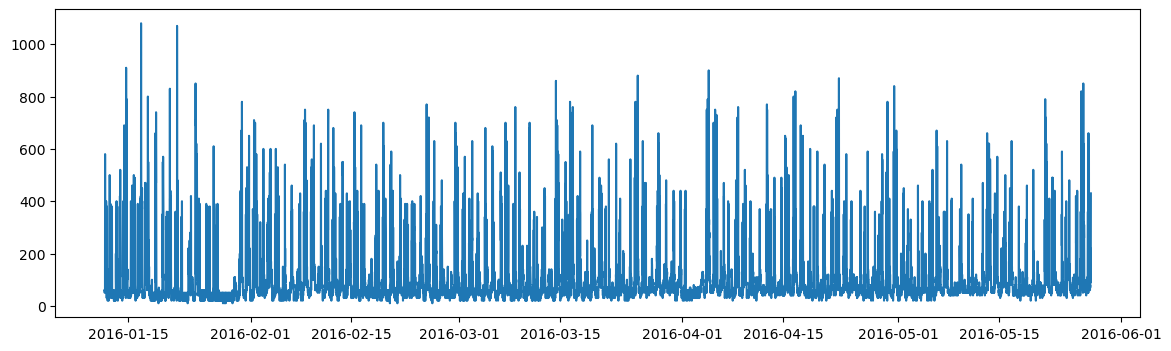

In [21]:
plt.figure(figsize=(14, 4))
plt.plot(data)

### 3. Implement prediction models

#### Auto Arima

In [18]:
from statsmodels.tsa.stattools import adfuller

data_hourly = data.resample('h').mean()
data_hourly

result = adfuller(data_hourly)
print(f'p-value: {result[1]}')

p-value: 8.833753129593984e-15


In [19]:
split1 = len(data_hourly['2016-05-01':])
train1 = data_hourly[:-split1]
test1 = data_hourly[-split1:]
print(f'Train1 shape: {train1.shape}')
print(f'Test1 shape: {test1.shape}')

Train1 shape: (2647, 1)
Test1 shape: (643, 1)


In [20]:
from pmdarima import auto_arima

model_arima = auto_arima(
    train1,
    seasonal=True,
    m=24,
    max_p=2, max_q=2, max_d=1,
    max_P=1, max_Q=1, max_D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=29744.880, Time=14.84 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=30974.462, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=29873.913, Time=5.17 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=30245.414, Time=4.47 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=33262.412, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[24] intercept   : AIC=29756.774, Time=6.98 sec
 ARIMA(2,0,2)(1,0,0)[24] intercept   : AIC=29745.435, Time=10.57 sec
 ARIMA(2,0,2)(0,0,0)[24] intercept   : AIC=29805.683, Time=1.14 sec
 ARIMA(1,0,2)(1,0,1)[24] intercept   : AIC=29628.465, Time=15.32 sec
 ARIMA(1,0,2)(0,0,1)[24] intercept   : AIC=29754.679, Time=4.73 sec
 ARIMA(1,0,2)(1,0,0)[24] intercept   : AIC=29743.439, Time=8.05 sec
 ARIMA(1,0,2)(0,0,0)[24] intercept   : AIC=29804.331, Time=0.71 sec
 ARIMA(0,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=13.69 sec
 ARIMA(1,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=12.94 sec
 ARIMA(0,0,1

#### LSTM

In [69]:
import torch
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn

series = data['Appliances'].values.reshape(-1,1)

scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

def create_sequences(data, seq_len):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        x = data[i:i+seq_len]
        y = data[i+seq_len][0]
        xs.append(x)
        ys.append(y)
    return (
        torch.tensor(np.array(xs), dtype=torch.float32),
        torch.tensor(np.array(ys), dtype=torch.float32).unsqueeze(1)
    )

seq_len = 6
X, y = create_sequences(series_scaled, seq_len)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :]) 
        return out
    
model_lstm = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001)

### 4. Train prediction models

#### Auto Arima

In [22]:
model_arima.fit(train1)

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(1, 0, 1, 24),
      suppress_warnings=True)

#### LSTM

In [70]:
for epoch in range(300):
    model_lstm.train()
    output = model_lstm(X_train)  
    loss = criterion(output, y_train)  
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.0104
Epoch 2, Loss: 0.0099
Epoch 3, Loss: 0.0096
Epoch 4, Loss: 0.0097
Epoch 5, Loss: 0.0097
Epoch 6, Loss: 0.0097
Epoch 7, Loss: 0.0096
Epoch 8, Loss: 0.0095
Epoch 9, Loss: 0.0094
Epoch 10, Loss: 0.0093
Epoch 11, Loss: 0.0093
Epoch 12, Loss: 0.0092
Epoch 13, Loss: 0.0092
Epoch 14, Loss: 0.0092
Epoch 15, Loss: 0.0091
Epoch 16, Loss: 0.0090
Epoch 17, Loss: 0.0090
Epoch 18, Loss: 0.0089
Epoch 19, Loss: 0.0088
Epoch 20, Loss: 0.0088
Epoch 21, Loss: 0.0087
Epoch 22, Loss: 0.0087
Epoch 23, Loss: 0.0086
Epoch 24, Loss: 0.0085
Epoch 25, Loss: 0.0085
Epoch 26, Loss: 0.0084
Epoch 27, Loss: 0.0083
Epoch 28, Loss: 0.0083
Epoch 29, Loss: 0.0082
Epoch 30, Loss: 0.0081
Epoch 31, Loss: 0.0080
Epoch 32, Loss: 0.0080
Epoch 33, Loss: 0.0079
Epoch 34, Loss: 0.0078
Epoch 35, Loss: 0.0077
Epoch 36, Loss: 0.0076
Epoch 37, Loss: 0.0075
Epoch 38, Loss: 0.0075
Epoch 39, Loss: 0.0074
Epoch 40, Loss: 0.0073
Epoch 41, Loss: 0.0072
Epoch 42, Loss: 0.0071
Epoch 43, Loss: 0.0070
Epoch 44, Loss: 0.00

### 5. Test predictin models and show results

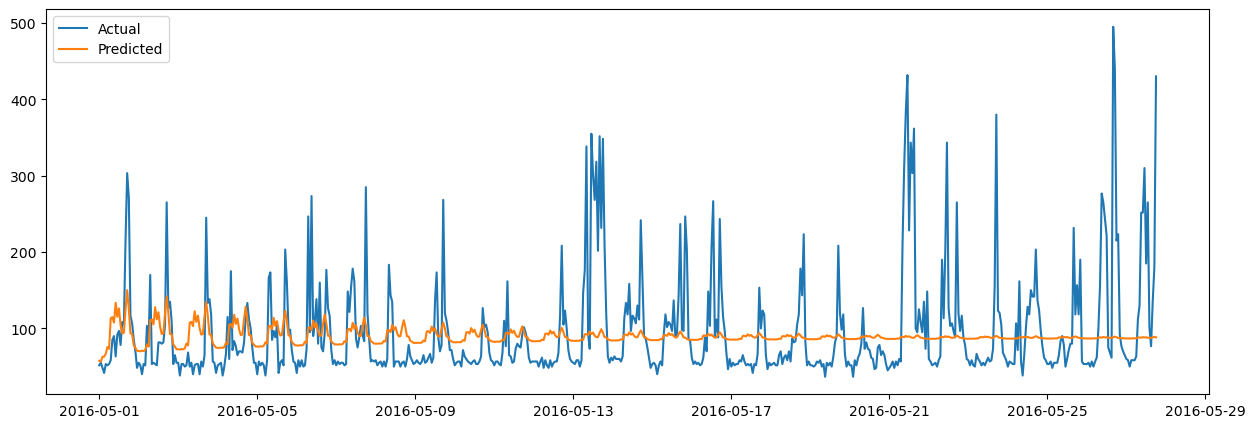

In [112]:
forecast_arima = model_arima.predict(n_periods=split1)  
forecast_arima = pd.Series(forecast_arima, index=test1.index)

plt.figure(figsize=(15, 5))
plt.plot(test1, label='Actual')
plt.plot(forecast_arima, label='Predicted')
plt.legend()
plt.show()

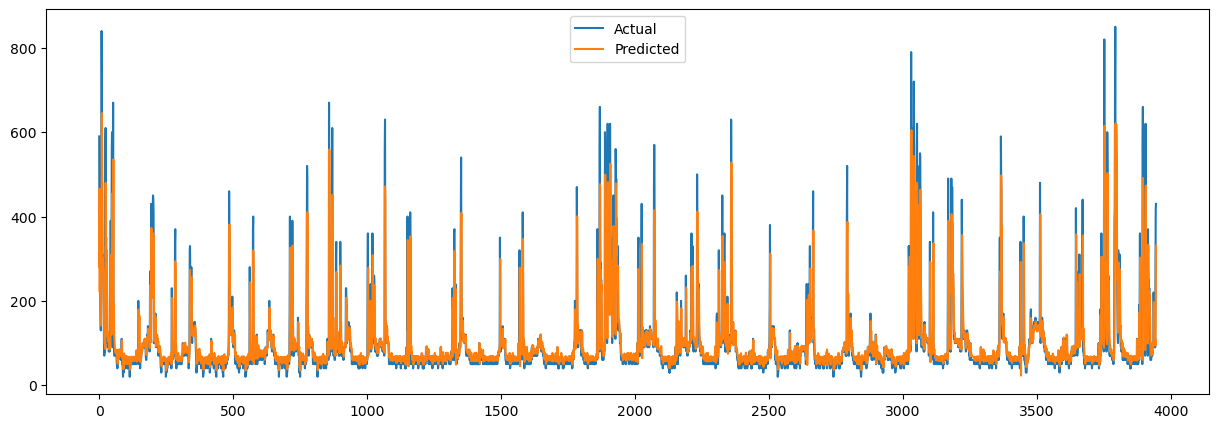

In [ ]:
model_lstm.eval()
with torch.no_grad():
    pred = model_lstm(X_test).squeeze().numpy()

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
pred_inv = scaler.inverse_transform(pred.reshape(-1, 1)).flatten()

plt.figure(figsize=(15, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(pred_inv, label='Predicted')
plt.legend()
plt.show()

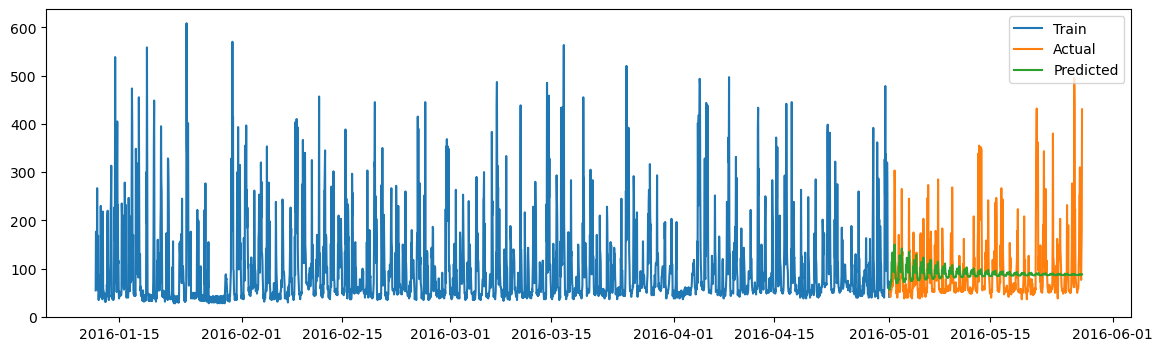

In [114]:
plt.figure(figsize=(14, 4))
plt.plot(train1, label='Train')
plt.plot(test1, label='Actual')
plt.plot(forecast_arima, label='Predicted')
plt.legend()
plt.show()

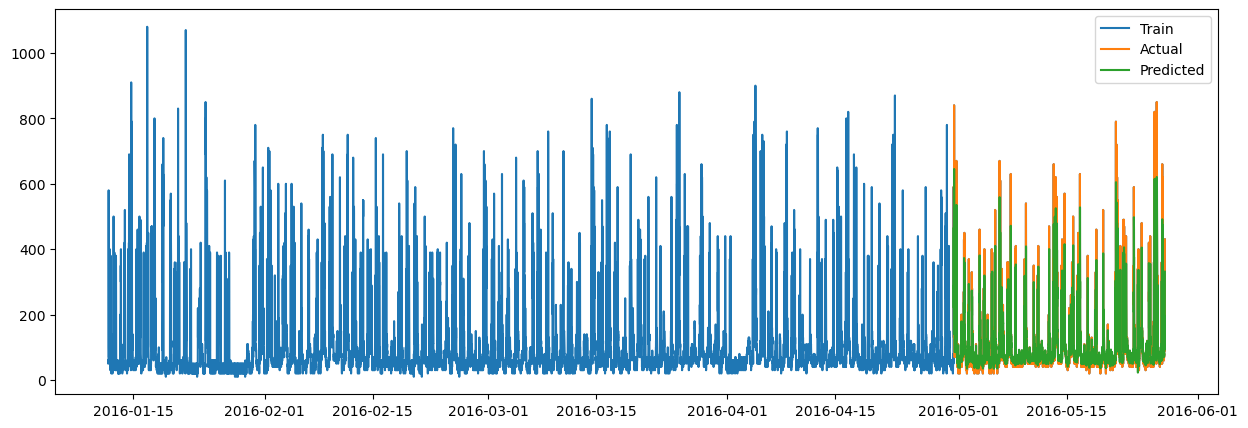

In [116]:
# 滑动窗口偏移后的索引
full_index = data.index[seq_len:]  
train_len = len(y_train)

# 测试集对应索引
test_index = full_index[train_len:]  

# 画图
plt.figure(figsize=(15, 5))
plt.plot(data, label='Train')  # 训练集真实值
plt.plot(test_index, y_test_inv, label='Actual')           
plt.plot(test_index, pred_inv, label='Predicted')           
plt.legend()
plt.show()

### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

Compare the results from all candidate models, choose the best model, justify your choice and discuss the results.

### 7. Reflect on what you have learned by completing this assignment

### 8. References